**ABOUT PNEUMONIA**

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing.


**ABOUT DATASET**

We choosed the Pneumonia Dataset consisting of 1341 normal images of lungs and 3875 images of lungs having Pneumonia in the training data set. Followed by 234 normal images and 390 lungs having Pneumonia in test data set also it consists of validation data set of 16 images.

In [ ]:
# Importing all necessary libraries
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import shutil
import glob
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import pickle
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline
import glob
from sklearn.metrics import precision_score

In [ ]:
load_weights = True

In [ ]:
from keras.layers.merge import concatenate
from keras.layers import Input
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
# kaggle kernels pull code/alifrahman/pneumonia-detection-with-cnn-auc-score-0-94

In [ ]:
# ../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg

In [ ]:
!pip install tf_keras_vis

     |████████████████████████████████| 53 kB 424 kB/s            


In [ ]:
import glob

In [ ]:
# Checking the number of Normal Lungs and Lungs with Pneumonia in training dataset 
train_normal_len = len(glob.glob('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/*'))
train_pneumonia_len = len(glob.glob('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*'))

In [ ]:
print(f"Total no of train images belonging to class Normal is: {train_normal_len}")
print(f"Total no of train images belonging to class Pneumonia is: {train_pneumonia_len}")

Total no of train images belonging to class Normal is: 1341
Total no of train images belonging to class Pneumonia is: 3875


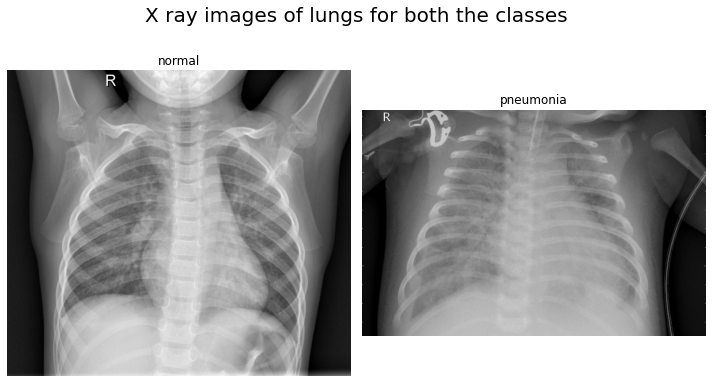

In [ ]:
# Plotting a single image of Normal and Pneumonia lungs from train dataset for purpose of visualization
img = Image.open('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img1 = Image.open("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")
fig, ax = plt.subplots(1, 2, figsize=(10, 14))
names = ['normal', 'pneumonia']
imgs = [img, img1]
for i, ax in enumerate(ax.flat):
  ax.set_title(names[i])
  ax.imshow(imgs[i], cmap='gray')
  ax.axis("off")
fig.suptitle("X ray images of lungs for both the classes", fontsize=20, y=0.7)
fig.tight_layout()
fig.show()

In [ ]:
from tensorflow.keras.preprocessing import image
image.img_to_array(img).shape

(1858, 2090, 1)

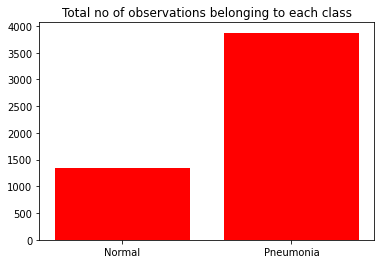

In [ ]:
#Visualizing value Counts in training data set
plt.bar(["Normal", "Pneumonia"], [train_normal_len, train_pneumonia_len], color='r')
plt.title("Total no of observations belonging to each class")
plt.show()

**INFERENCE** From EDA we get to know that our dataset is imbalanced.

In [ ]:
# Using ImageDataGenerator to rescale the images and load the images into traingen.testgen,valgen
datagen = ImageDataGenerator(rescale=1/255)
traingen = datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/train", target_size=(224, 224),
                                               class_mode='binary', batch_size=16, shuffle=True)
testgen = datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/test", target_size=(224, 224),
                                               class_mode='binary', batch_size=16, shuffle=True)
valgen = datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/val", target_size=(224, 224),
                                               class_mode='binary', batch_size=16, shuffle=True)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
#Using iter function to get the corresponding image and label
image, label = next(iter(traingen))

In [ ]:
image[0].shape

(224, 224, 3)

In [ ]:
normal_img = image[label == 0][0]
pneumonia_img = image[label == 1][0]

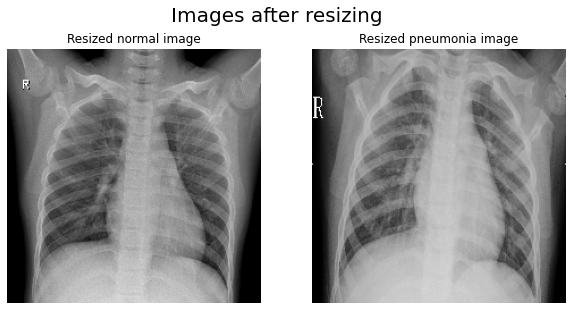

In [ ]:
# Plotting resized imaged of both the classes
fig, ax = plt.subplots(1, 2, figsize=(10, 14))
ax[0].set_title("Resized normal image")
ax[0].imshow(np.squeeze(normal_img), cmap='gray')
ax[0].axis("off")
ax[1].set_title("Resized pneumonia image")
ax[1].imshow(np.squeeze(pneumonia_img), cmap='gray')
ax[1].axis("off")
fig.suptitle("Images after resizing",  fontsize=20, y=0.67)
fig.show()

**FIRST MODEL USING BASIC CNN ARCHITECTURE**

In [ ]:
# Sequential model with Conv2D,MaxPooling,Dense,Dropout,Batch Normalization
# activation = relu and activation in output layer as sigmoid
model = Sequential(name = 'Pneumonia_first_model')
model.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same',input_shape = (224, 224, 3)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "Pneumonia_first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)  

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
# EarlyStopping on the basis of validation accuracy
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=4, restore_best_weights=True)

# Model checkpoint used to save the weights corresponding to epoch having best validation accuracy
mc = ModelCheckpoint('first_model.h5', save_best_only = True, save_weights_only = True,
                             monitor = 'val_accuracy', 
                             mode = 'max', verbose = 1)

In [ ]:
if load_weights:
    try:
        f = open("../input/final-model-weights-univ-pneumonia/first_model (1).h5")
        model.load_weights('../input/final-model-weights-univ-pneumonia/first_model (1).h5')
    except IOError:
        print("File not accessible")
    finally:
        f.close()
        
    history=np.load('../input/final-model-weights-univ-pneumonia/model1_history.npy',allow_pickle='TRUE').item()

In [ ]:
if not load_weights:
    history = model.fit(traingen, validation_data=testgen, epochs=20, callbacks=[es, mc])
    np.save('model1_history.npy',history.history)

> ⚠️⚠️⚠️Please change the history.history to just history when import model history

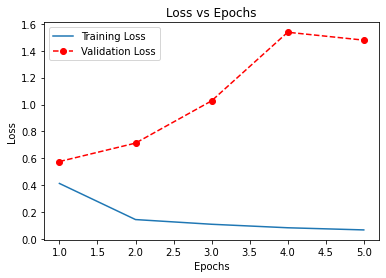

In [ ]:
# Plotting the losses acquired with respect to number of epochs
epochs = np.arange(1,len(history['loss'])+1)
training_loss = history['loss']
validation_loss = history['val_loss']
plt.plot(epochs,training_loss,label = "Training Loss")
plt.plot(epochs,validation_loss,'r--',marker = "o",label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs Epochs')
plt.legend(loc='best')
plt.show()

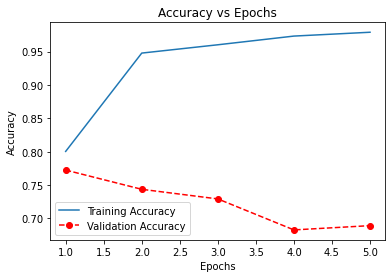

In [ ]:
# Plotting the accuarcies acquired with respect to number of epochs
epochs = np.arange(1,len(history['accuracy'])+1)
training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']
plt.plot(epochs,training_accuracy,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy,'r--',marker = "o",label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Epochs')
plt.legend(loc="best")
plt.show()

**INFERENCE** Since we haven't done any class augmentation and the class datasets are highly imbalanced so the model validation accuracy is comparatively lower than training accuracy but the validation loss is higher than training loss.

In [ ]:
#Getting the true labels of test data 
import math
y_val_true = []
n = len(testgen.filenames)
no_of_batches = math.ceil(n / 16)
for i in range(0, no_of_batches):
    y_val_true.extend(testgen[i][1])

In [ ]:
#Predicting on the testgen
y_predict_val = model.predict(testgen)
y_predict_val = y_predict_val.reshape(-1)
y_predict_val.shape

2022-04-14 11:34:17.269961: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-14 11:34:18.580009: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


(624,)

In [ ]:
#keeping threshold 0.5 and converting y_pred_label to 1 or 0 
y_predict_label_val = (y_predict_val > 0.5) * 1
y_predict_label_val[:10]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
#For working in sklearn metrics libraries converting y_true to a vector
y_true_val = np.array(y_val_true)
y_true_val.shape

(624,)

In [ ]:
#Calculating the precision
precision_1 = precision_score(y_true_val, y_predict_label_val)
print(f"Model's precision score is: {precision_1:.3f}")

Model's precision score is: 0.738


**INFERENCE**
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0. But our model gives precision of 0.738 which needs some further tuning.

In [ ]:
#Calculating the recall
from sklearn.metrics import recall_score
recall_1 = recall_score(y_true_val, y_predict_label_val)
print(f"Model's recall score is: {recall_1:.3f}")

Model's recall score is: 0.987


**INFERENCE**
The recall score should be ideally one for good classifer and our model's recall score 0.987 is quite close to 1. So we can understand that the model has low False Negative Values 

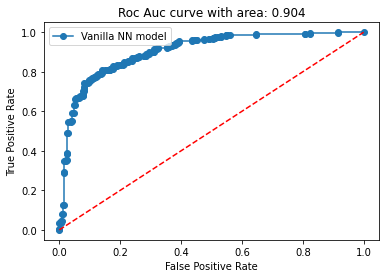

In [ ]:
#Using Roc_auc curve to know exactly how good is our model performing to distinguish between Normal and Pneumonia cases. 
from sklearn.metrics import roc_auc_score
from  sklearn.metrics import roc_curve
roc_score_1 = roc_auc_score(y_true_val, y_predict_val)
fpr1, tpr1, thresh = roc_curve(y_true_val, y_predict_val)
plt.plot(fpr1, tpr1, label="Vanilla NN model", marker='o')
plt.plot(fpr1, fpr1, '--r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Roc Auc curve with area: {roc_score_1:.3f}")
plt.legend(loc='best')
plt.show()

**INFERENCE**
The Auc is 0.904 which indicates that our vanilla model effectively distinguishes between normal and lungs with Pneumonia. 

In [ ]:
#Classification Report to find out precision,recall,f1-score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_true_val, y_predict_label_val)
cm1

array([[ 97, 137],
       [  5, 385]])

In [ ]:
print(classification_report(y_true_val, y_predict_label_val))

              precision    recall  f1-score   support

         0.0       0.95      0.41      0.58       234
         1.0       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



**INFERENCE** 

From the classification report above we can clearly see that the precision score for Normal lungs image is high but the recall score of lungs with Pneunomia is high. This leads us to the statement that the recall and precision are a sort of trade of among themselves with increase in one value the other one decreases. There are low false positive rates in case of Normal Lungs and low false negative rates in case of Pneumonia affected lungs.

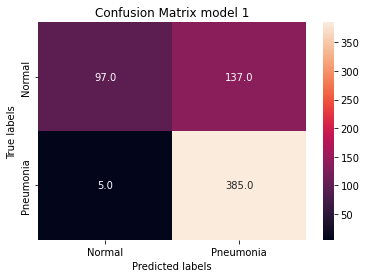

In [ ]:
#Plotting the Confusion Matrix
import seaborn as sn
ax= plt.subplot()
sn.heatmap(cm1, annot=True, fmt=".1f", ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix model 1')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia'])
ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
fig.show()

**Keeping the above model architecture same we introduced the class weights to again train on the same dataset.**

In [ ]:
# getting all the label from train gen (training data) for ealuating class weights
if not not load_weights:
    y_true = []
    n = len(traingen.filenames)
    no_of_batches = math.ceil(n / 16)
    for i in range(0, no_of_batches):
        y_true.extend(traingen[i][1])
    y_true = np.array(y_true).reshape(-1)
    assert y_true.shape == (5216,)
    
    c_weights = class_weight.compute_class_weight('balanced', 
                                                  classes=np.unique(y_true), y=y_true)
    c_weights = {0:c_weights[0],1:c_weights[1]}
    print(c_weights)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [ ]:
# Sequential model with Conv2D,MaxPooling,Dense,Dropout,Batch Normalization
# activation = relu and activation in output layer as sigmoid
model1 = Sequential(name = 'Pneumonia_second_model')
model1.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same',input_shape = (224, 224, 3)))
model1.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model1.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation = 'relu'))
model1.add(Dropout(0.4))
model1.add(Dense(128,activation = 'relu'))
model1.add(Dropout(0.4))
model1.add(Dense(64))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dense(1,activation = 'sigmoid'))
model1.summary()

Model: "Pneumonia_second_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704) 

model.save_weights('first_model.h5')

In [ ]:
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
if load_weights:
    model1.load_weights('../input/final-model-weights-univ-pneumonia/second_model (1).h5')
    history1=np.load('../input/final-model-weights-univ-pneumonia/model2_history (1).npy',allow_pickle='TRUE').item()

In [ ]:
if not load_weights:
    es1 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', 
                                           patience=5, restore_best_weights=True)
    
    mc1 = ModelCheckpoint('second_model.h5', save_best_only = True, save_weights_only = True,
                                 monitor = 'val_accuracy', 
                                 mode = 'max', verbose = 1)
    
    history1 = model1.fit(traingen, validation_data=testgen, epochs=20, 
                          callbacks=[es1, mc1], class_weight=c_weights)
    np.save('model2_history.npy',history1.history)

In [ ]:
model1.evaluate(testgen)

39/39 [==============================] - 7s 157ms/step - loss: 0.6852 - accuracy: 0.8141


[0.6851778626441956, 0.8141025900840759]

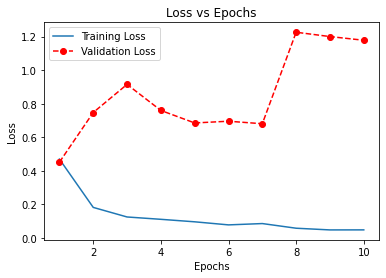

In [ ]:
epochs = np.arange(1,len(history1['loss'])+1)
training_loss = history1['loss']
validation_loss = history1['val_loss']
plt.plot(epochs,training_loss,label = "Training Loss")
plt.plot(epochs,validation_loss,'r--',marker = "o",label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs Epochs')
plt.legend(loc='best')
plt.show()

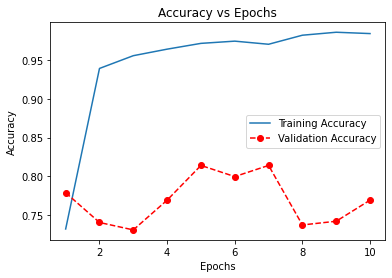

In [ ]:
epochs = np.arange(1,len(history1['accuracy'])+1)
training_accuracy = history1['accuracy']
validation_accuracy = history1['val_accuracy']
plt.plot(epochs,training_accuracy,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy,'r--',marker = "o",label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Epochs')
plt.legend(loc="best")
plt.show()

**INFERENCE** 
After introducing the concepts of class weights to the second model, the model performance tends to be hindered and the validation accuracy has worsend compared to vanilla model.

In [ ]:
#Getting the predicted values from the testgen
y_predict_val_2 = model1.predict(testgen)
y_predict_val_2 = y_predict_val_2.reshape(-1)
y_predict_val_2.shape

(624,)

In [ ]:
y_predict_label_val_2 = (y_predict_val_2 > 0.5) * 1
y_predict_label_val_2[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
assert y_true_val.shape == (624,)

In [ ]:
#Precision for the second model.
precision_2 = precision_score(y_true_val, y_predict_label_val_2)
print(f"Model's precision score is: {precision_2:.3f}")

Model's precision score is: 0.619


**INFERENCE**
From the Precision score of second model we can observe that the false positive rates have increased a lot.

In [ ]:
#Recall score for the second model
recall_2 = recall_score(y_true_val, y_predict_label_val_2)
print(f"Model's recall score is: {recall_2:.3f}")

Model's recall score is: 0.787


**INFERENCE**
The recall score of second model has decreased comparatively to the first model. 

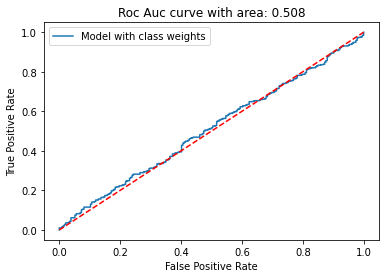

In [ ]:
#Plotting the Roc-Auc curve of second model 
roc_score_2 = roc_auc_score(y_true_val, y_predict_val_2)
fpr2, tpr2, thresh = roc_curve(y_true_val, y_predict_val_2)
plt.plot(fpr2, tpr2, label="Model with class weights")
plt.plot(fpr2, fpr2, '--r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Roc Auc curve with area: {roc_score_2:.3f}")
plt.legend(loc='best')
plt.show()

**INFERENCE**
The Roc_auc score is pretty bad only 0.508 it signifies that the model is not being able to predict between Normal and Pneumonia classes i.e there is no clearcut separation between the classes and its predictions are completely opposite to what the model should predict.

In [ ]:
cm2 = confusion_matrix(y_true_val, y_predict_label_val_2)
cm2

array([[ 45, 189],
       [ 83, 307]])

In [ ]:
#Classification Report of second model
print(classification_report(y_true_val, y_predict_label_val_2))

              precision    recall  f1-score   support

         0.0       0.35      0.19      0.25       234
         1.0       0.62      0.79      0.69       390

    accuracy                           0.56       624
   macro avg       0.49      0.49      0.47       624
weighted avg       0.52      0.56      0.53       624



**INFERENCE**
The precsion and recall score of Normal cases is much less , but the scores in case of Pneumonia cases is high which maybe due to the imbalanced data set. The Pneumonia lungs images are more comparatively to normal ones. 

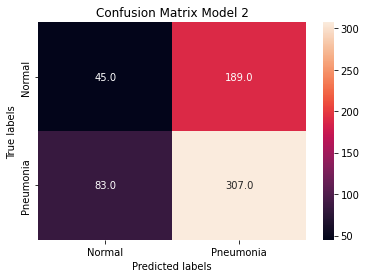

In [ ]:
#Plotting the confusion matrix for second model
ax= plt.subplot()
sn.heatmap(cm2, annot=True, fmt=".1f", ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Model 2')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia'])
ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
fig.show()

**We found at that the model without class weights was perferorming much better the with class weights assigned**

Here we are plotting the attention maps of the first model

In [ ]:
batch_no = 1
batch1 = testgen[batch_no][0]

In [ ]:
batch1_true = testgen[batch_no][1]
batch1_true

array([1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.],
      dtype=float32)

In [ ]:
batch1_predict = model.predict(batch1)
batch1_label = (batch1_predict > 0.5) * 1
batch1_label_predict = batch1_label.reshape(-1)
batch1_label_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
idx = batch1_true == batch1_label_predict
idx

array([ True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
# getting the index the minimum from the count of true and false values which 
# correclty predicted  class was 1 (pneumonia).
mapping_1 = batch1_label_predict * idx
mapping_0 = batch1_label_predict == 0 * idx
i = 0

In [ ]:
mapping_1 = mapping_1.astype(bool)
mapping_0 = mapping_0.astype(bool)
mapping_0, mapping_1

(array([False, False, False, False, False, False, False, False, False,
        False,  True, False,  True, False, False,  True]),
 array([ True, False,  True,  True, False,  True,  True, False,  True,
         True, False,  True, False,  True,  True, False]))

In [ ]:
#getting the ith example which was correctly and incorrectly predicted in batch[batch_no]
# picking the ith value and label of the image which was correcly classified as pneumonia
input_image_true_1 = batch1[mapping_1][i]
input_image_true_label_1 = batch1_true[mapping_1][i]
input_image_true_label_1

1.0

In [ ]:
class_map = {0: "Normal", 1: "Pneumonia"}

In [ ]:
input_image_true_0 = batch1[mapping_0][i]
input_image_true_label_0 = batch1_true[mapping_0][i]
input_image_true_label_0

0.0

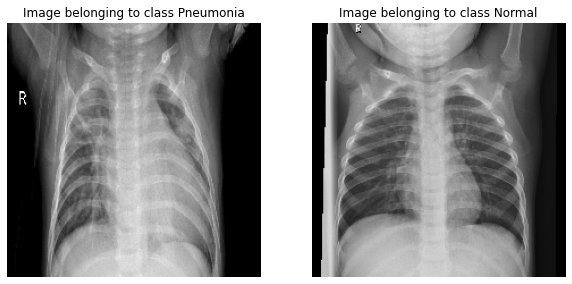

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(input_image_true_1)
ax[0].set_title(f"Image belonging to class {class_map[input_image_true_label_1]}")
ax[0].axis("off")
ax[1].imshow(input_image_true_0)
ax[1].set_title(f"Image belonging to class {class_map[input_image_true_label_0]}")
ax[1].axis("off")
fig.show()

In [ ]:
#Plotting gradcam and silency map of the first model

import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.saliency import Saliency

replace2linear = ReplaceToLinear()

In [ ]:
# if the output is beloging to class 1 then score function should return output[:,0] 
#else if it's 0 then -1 * output[:,0]
def score_fun_1(output):
    return output[:,0]
def score_fun_0(output):
    return -1.0 * output[:, 0]

In [ ]:
saliency = Saliency(model1, model_modifier=ReplaceToLinear(), clone=True)

saliency_map = saliency(score_fun_1, input_image_true_1, smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

saliency_map_0 = saliency(score_fun_0, input_image_true_0, smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20)

In [ ]:
#checking the gradcam of second to last convolution layer
gradcam = Gradcam(model1, model_modifier=ReplaceToLinear(), clone=True)
cam = gradcam(score_fun_1, input_image_true_1, penultimate_layer=3)
cam_0 = gradcam(score_fun_0, input_image_true_0, penultimate_layer=3)

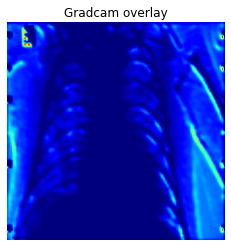

In [ ]:
from matplotlib import cm
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
plt.imshow(heatmap, cmap='jet')#color map = jet gives a specific color option
plt.axis('off')
plt.title("Gradcam overlay")
plt.show()
#Plotting to check if cmap would be visible

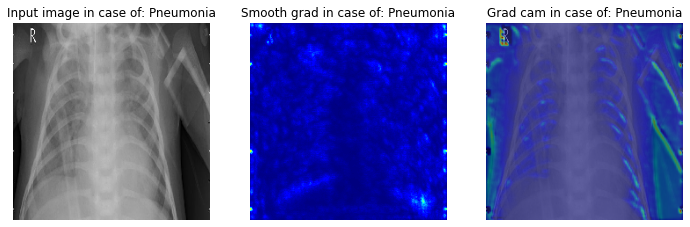

In [ ]:
#plotting the attention images
fig, axis = plt.subplots(1, 3, figsize=(12, 12))
label= ['Input image', 'Smooth grad', 'Grad cam']
c = 'jet'
for i, ax in enumerate(axis.flat):
  ax.set_title(f"{label[i]} in case of: {class_map[input_image_true_label_1]}")
  if i == 0:
    ax.imshow(input_image_true_1, cmap='gray')                
  elif i == 1:
    ax.imshow(saliency_map[0], cmap=c)
  else:
    heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
    ax.imshow(input_image_true_1, cmap='gray')
    ax.imshow(heatmap, cmap=c, alpha=0.5)
  ax.axis('off')
fig.show()

**INFERENCE**
Not much can be infered from Smooth Grad, but in case of Grad Cam the ribs of lungs having Pneumonia is not visible properly due to the presence of fluids or pus that causes  opaqueness.

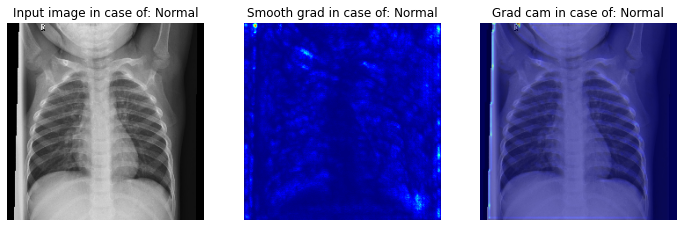

In [ ]:
#plotting the attention images
fig, axis = plt.subplots(1, 3, figsize=(12, 12))
label= ['Input image', 'Smooth grad', 'Grad cam']
c = 'jet'
for i, ax in enumerate(axis.flat):
  ax.set_title(f"{label[i]} in case of: {class_map[input_image_true_label_0]}")
  if i == 0:
    ax.imshow(input_image_true_0, cmap='gray')                
  elif i == 1:
    ax.imshow(saliency_map_0[0], cmap=c)
  else:
    heatmap = np.uint8(cm.jet(cam_0[0])[..., :3] * 255)
    ax.imshow(input_image_true_0, cmap='gray')
    ax.imshow(heatmap, cmap=c, alpha=0.5)
  ax.axis('off')
fig.show()

**INFERENCE **
From the above plots we can clearly visualize the lungs including the rib of normal/healthy person in contrary to its Pneumonia counterpart.

In [ ]:
#Transfer Learning using MobileNet and DenseNet with there respective weights
input_shape = (224, 224, 3)
mobilenet = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = input_shape)
densenet = DenseNet169(weights = 'imagenet', include_top = False, input_shape = input_shape)
for layer in mobilenet.layers:
    layer.trainable =  False
for layer in densenet.layers:
    layer.trainable = False
#mobile net
input_layer = Input(shape=(input_shape))
mobilenet_1 = mobilenet(input_layer)
mobilenet_1 = GlobalAveragePooling2D()(mobilenet_1)
output_mobilenet = Flatten()(mobilenet_1)

#dense net
densenet_2 = densenet(input_layer)
densenet_2 = GlobalAveragePooling2D()(densenet_2)
output_densenet = Flatten()(densenet_2)

#concatenated layer
meta_input = tf.keras.layers.Concatenate()([output_mobilenet, output_densenet])
x = BatchNormalization()(meta_input)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation = 'sigmoid')(x)

meta_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
meta_model.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
mobilenetv2_1.00_224 (Functiona (None, 7, 7, 1280)   2257984     input_6[0][0]                    
__________________________________________________________________________________________________
densenet169 (Functional)        (None, 7, 7, 1664)   12642880    input_6[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d_2 (Glo (None, 1280)         0           mobilenetv2_1.00_224[0][0]       
___________________________________________________________________________________________

In [ ]:
es2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', 
                                       patience=8, restore_best_weights=True)

# to save the weights of the best performing epoch
mc1 = ModelCheckpoint('third_model.h5', save_best_only = True, save_weights_only = True,
                             monitor = 'val_accuracy', 
                             mode = 'max', verbose = 1)

In [ ]:
total_samples = len(traingen.filenames)
batch_size = 16

In [ ]:
steps_per_epoch = total_samples // batch_size

In [ ]:
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import math

In [ ]:
history2 = meta_model.fit(traingen, validation_data=testgen,
               callbacks=[es2, mc1], epochs=30)

Epoch 1/30
326/326 [==============================] - 82s 251ms/step - loss: 0.1637 - accuracy: 0.9496 - val_loss: 0.5122 - val_accuracy: 0.8654

Epoch 00001: val_accuracy improved from -inf to 0.86538, saving model to third_model.h5
Epoch 2/30
326/326 [==============================] - 78s 238ms/step - loss: 0.1080 - accuracy: 0.9622 - val_loss: 0.5683 - val_accuracy: 0.8590

Epoch 00002: val_accuracy did not improve from 0.86538
Epoch 3/30
326/326 [==============================] - 78s 240ms/step - loss: 0.0749 - accuracy: 0.9745 - val_loss: 0.6731 - val_accuracy: 0.8510

Epoch 00003: val_accuracy did not improve from 0.86538
Epoch 4/30
326/326 [==============================] - 78s 238ms/step - loss: 0.0642 - accuracy: 0.9770 - val_loss: 0.7538 - val_accuracy: 0.8333

Epoch 00004: val_accuracy did not improve from 0.86538
Epoch 5/30
326/326 [==============================] - 78s 239ms/step - loss: 0.0561 - accuracy: 0.9789 - val_loss: 0.8535 - val_accuracy: 0.8349

Epoch 00005: val_

In [ ]:
meta_model.evaluate(testgen)

39/39 [==============================] - 8s 192ms/step - loss: 0.5122 - accuracy: 0.8654


[0.5122445821762085, 0.8653846383094788]

In [ ]:
np.save('meta_model_history.npy',history2.history)

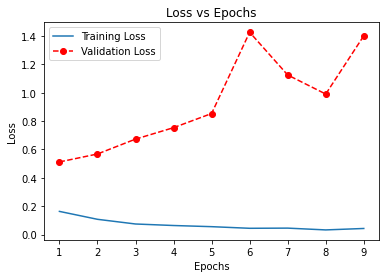

In [ ]:
epochs = np.arange(1,len(history2.history['loss'])+1)
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
plt.plot(epochs,training_loss,label = "Training Loss")
plt.plot(epochs,validation_loss,'r--',marker = "o",label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs Epochs')
plt.legend(loc='best')
plt.show()

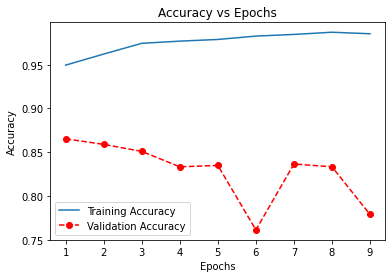

In [ ]:
epochs = np.arange(1,len(history2.history['accuracy'])+1)
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']
plt.plot(epochs,training_accuracy,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy,'r--',marker = "o",label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Epochs')
plt.legend(loc="best")
plt.show()

**INFERENCE**
By using Transfer Learning the validation accuracy is being improved if compared with the second model and it looks more promising in classying the images more accuartely. 

In [ ]:
y_true_meta = []
n = len(testgen.filenames)
no_of_batches = math.ceil(n / 16)
for i in range(0, no_of_batches):
    y_true_meta.extend(testgen[i][1])

In [ ]:
y_true_meta = np.array(y_true_meta).reshape(-1)
y_true_meta.shape

(624,)

In [ ]:
y_predict_val_3 = meta_model.predict(testgen)
y_predict_val_3 = y_predict_val_3.reshape(-1)
y_predict_val_3.shape

(624,)

In [ ]:
y_predict_label_val_3 = (y_predict_val_3 > 0.5) * 1
y_predict_label_val_3[:10]

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
y_true_meta.shape

(624,)

In [ ]:
#Precision of Transfer Learning Model
precision_meta = precision_score(y_true_meta, y_predict_label_val_3)
print(f"Model's precision score is: {precision_meta}")

Model's precision score is: 0.8269230769230769


**INFERENCE**
With the precision of more than 82% we can say that the model gives more relevant results rather than irrelevant ones.False Positive rates are very low.

In [ ]:
# Recall of Transfer Learning
recall_meta = recall_score(y_true_meta, y_predict_label_val_3)
print(f"Model's recall score is: {recall_meta:.3f}")

Model's recall score is: 0.992


**INFERENCE**
A recall score of as high as 99.2% shows that our model has very low false negative rates from this we can say that the model is quite accurate.

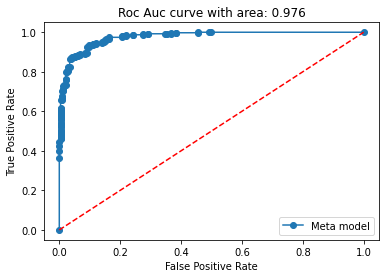

In [ ]:
#Roc Auc curve
from sklearn.metrics import roc_auc_score
from  sklearn.metrics import roc_curve
roc_score_meta = roc_auc_score(y_true_meta, y_predict_val_3)
fpr3, tpr3, thresh = roc_curve(y_true_meta, y_predict_val_3)
plt.plot(fpr3, tpr3, label="Meta model", marker='o')
plt.plot(tpr3, tpr3, '--r')
plt.plot()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Roc Auc curve with area: {roc_score_meta:.3f}")
plt.legend(loc='best')
plt.show()

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. So since the Roc Auc has 0.976 it means the classes are well separated on the basis of there features.

In [ ]:
print(classification_report(y_true_meta, y_predict_label_val_3))

              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78       234
         1.0       0.83      0.99      0.90       390

    accuracy                           0.87       624
   macro avg       0.90      0.82      0.84       624
weighted avg       0.88      0.87      0.86       624



In [ ]:
batch1_predict = meta_model.predict(batch1)
batch1_label = (batch1_predict > 0.5) * 1
batch1_label_predict = batch1_label.reshape(-1)
batch1_label_predict

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Classes predicted correctly for a particular batch 
idx = batch1_true == batch1_label_predict
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True])

In [ ]:
# getting the index the minimum from the count of true and false values which 
# correclty predicted  class was 1 (pneumonia).
mapping_1 = batch1_label_predict * idx
mapping_0 = batch1_label_predict == 0 * idx
i = 0

In [ ]:
#Boolean mapping corresponding to class Pneumonia and predicted correctly  
mapping_1 = mapping_1.astype(bool)
#Boolean mapping corresponding to class Normal and predicted correctly
mapping_0 = mapping_0.astype(bool)
mapping_0, mapping_1

(array([False,  True, False, False,  True, False, False,  True, False,
        False,  True, False, False, False, False,  True]),
 array([ True, False,  True,  True, False,  True,  True, False,  True,
         True, False,  True, False,  True,  True, False]))

In [ ]:
i

0

In [ ]:
#getting the ith example which was correctly and incorrectly predicted in batch[batch_no]
# picking the ith value and label of the image which was correcly classified as pneumonia
input_image_true_1 = batch1[mapping_1][i]
input_image_true_label_1 = batch1_true[mapping_1][i]
input_image_true_label_1

1.0

In [ ]:
input_image_true_0 = batch1[mapping_0][i]
input_image_true_label_0 = batch1_true[mapping_0][i]
input_image_true_label_0

0.0

In [ ]:
#Getting saliency maps for both the classes
saliency = Saliency(meta_model, model_modifier=ReplaceToLinear(), clone=True)

saliency_map = saliency(score_fun_1, input_image_true_1, smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

saliency_map_0 = saliency(score_fun_0, input_image_true_0, smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20)

In [ ]:
meta_model.layers

In [ ]:
#checking the gradcam of second to last convolution layer of both the classes
gradcam = Gradcam(model1, model_modifier=ReplaceToLinear(), clone=True)
cam = gradcam(score_fun_1, input_image_true_1, penultimate_layer=3)
cam_0 = gradcam(score_fun_0, input_image_true_0, penultimate_layer=3)

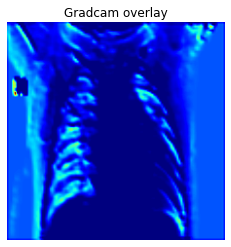

In [ ]:
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
plt.imshow(heatmap, cmap='jet')
plt.axis('off')
plt.title("Gradcam overlay")
plt.show()

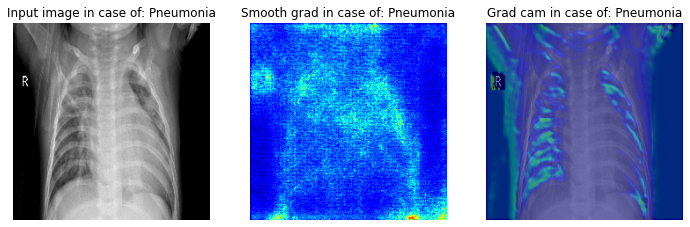

In [ ]:
#plotting the attention images of pneumonia
fig, axis = plt.subplots(1, 3, figsize=(12, 12))
label= ['Input image', 'Smooth grad', 'Grad cam']
c = 'jet'
for i, ax in enumerate(axis.flat):
  ax.set_title(f"{label[i]} in case of: {class_map[input_image_true_label_1]}")
  if i == 0:
    ax.imshow(input_image_true_1, cmap='gray')                
  elif i == 1:
    ax.imshow(saliency_map[0], cmap=c)
  else:
    heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
    ax.imshow(input_image_true_1, cmap='gray')
    ax.imshow(heatmap, cmap=c, alpha=0.5)
  ax.axis('off')
fig.show()

**INFERENCE** From the above plots of Smooth Grad and Grad Cam for the case of Pneumonia we can observe that it not only detects if a person is having disease or not rather in Grad Cam it shows which parts of lungs are mostly affected due to the Pneumonia.

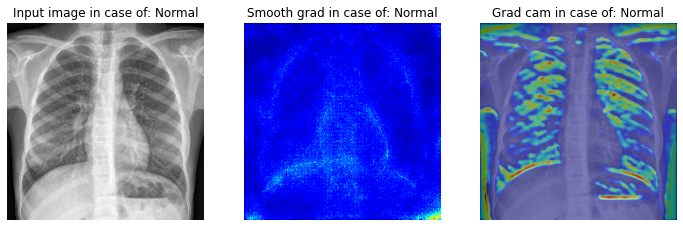

In [ ]:
#plotting the attention images
fig, axis = plt.subplots(1, 3, figsize=(12, 12))
label= ['Input image', 'Smooth grad', 'Grad cam']
c = 'jet'
for i, ax in enumerate(axis.flat):
  ax.set_title(f"{label[i]} in case of: {class_map[input_image_true_label_0]}")
  if i == 0:
    ax.imshow(input_image_true_0, cmap='gray')                
  elif i == 1:
    ax.imshow(saliency_map_0[0], cmap=c)
  else:
    heatmap = np.uint8(cm.jet(cam_0[0])[..., :3] * 255)
    ax.imshow(input_image_true_0, cmap='gray')
    ax.imshow(heatmap, cmap=c, alpha=0.5)
  ax.axis('off')
fig.show()

**INFERENCE**
In case of Normal Lunngs Grad Cam effectively captures most of the ribs in the lungs and shows that the person doesnt have lung disease.

In [ ]:
#Creating model matrics dataframe
df_dict = {
    "recall": [recall_1, recall_2, recall_meta],
    "precision": [precision_1, precision_2, precision_meta],
    "ROC AUC": [roc_score_1, roc_score_2, roc_score_meta]
}

In [ ]:
import pandas as pd
df = pd.DataFrame(df_dict, index=['Model 1', 'Model 2 with class weights', 'Meta Model'])

In [ ]:
df.style.background_gradient(cmap="Reds")

,recall,precision,ROC AUC
Model 1,0.987179,0.737548,0.903561
Model 2 with class weights,0.787179,0.618952,0.508383
Meta Model,0.992308,0.826923,0.976485


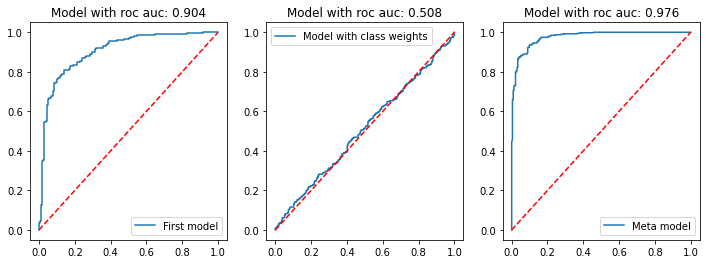

In [ ]:
#Roc_auc of all the 3 models
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fprs = [fpr1, fpr2, fpr3]
tprs = [tpr1, tpr2, tpr3]
roc = [roc_score_1, roc_score_2, roc_score_meta]
labels = ["First model", "Model with class weights", "Meta model"]
for i, ax in enumerate(ax.flat):
    ax.plot(fprs[i], tprs[i], label=labels[i])
    ax.plot(fprs[i], fprs[i], '--r')
    ax.set_title(f"Model with roc auc: {roc[i]:.3f}")
    ax.legend(loc='best')
fig.show()